<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-28 13:34:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  48.4MB/s    in 0.7s    

2024-11-28 13:34:11 (48.4 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Note: you may need to restart the kernel to use updated packages.


## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [39]:
QUERY = """
SELECT COUNT(Respondent) AS [Total Respondents],LanguageDesireNextYear
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df

,Total Respondents,LanguageDesireNextYear
0,336,Assembly
1,3097,Bash/Shell/PowerShell
2,1028,C
3,3591,C#
4,1633,C++
5,413,Clojure
6,610,Dart
7,620,Elixir
8,310,Erlang
9,621,F#


In [42]:
QUERY = """
SELECT COUNT(Respondent) AS [Total Respondents],DatabaseWorkedWith
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
"""
df = pd.read_sql_query(QUERY,conn)
df

,Total Respondents,LanguageWorkedWith
0,437,Assembly
1,4642,Bash/Shell/PowerShell
2,1578,C
3,4288,C#
4,1946,C++
5,164,Clojure
6,237,Dart
7,187,Elixir
8,98,Erlang
9,158,F#


## Demo: How to run a group by query


In [19]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
df = pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:>

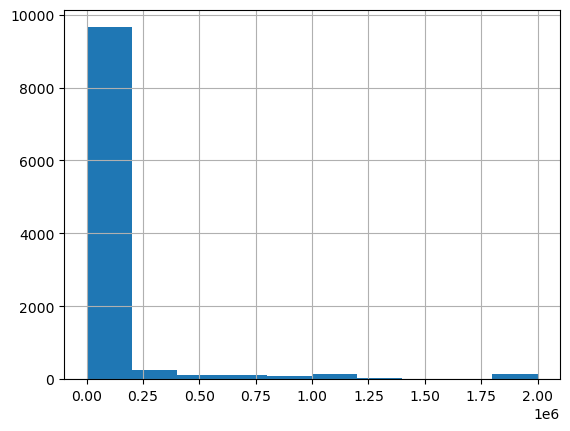

In [8]:
# your code goes here
QUERY = """
SELECT * FROM
master
"""
df = pd.read_sql_query(QUERY,conn)
df['ConvertedComp'].hist()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:ylabel='Age'>

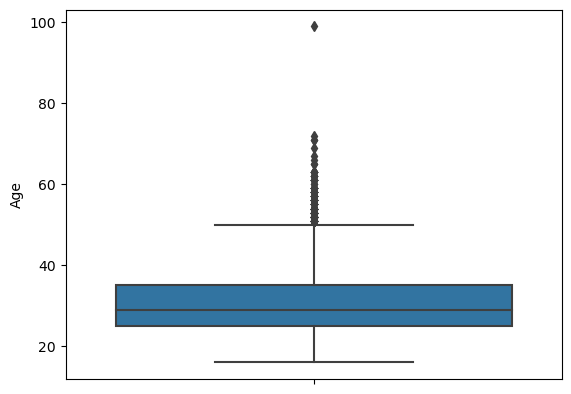

In [9]:
# your code goes here
sns.boxplot(y = df['Age'])

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

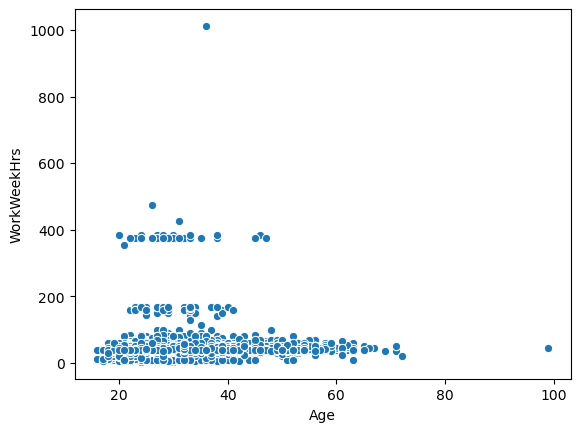

In [10]:
# your code goes here
sns.scatterplot(data = df,x= 'Age',y = 'WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

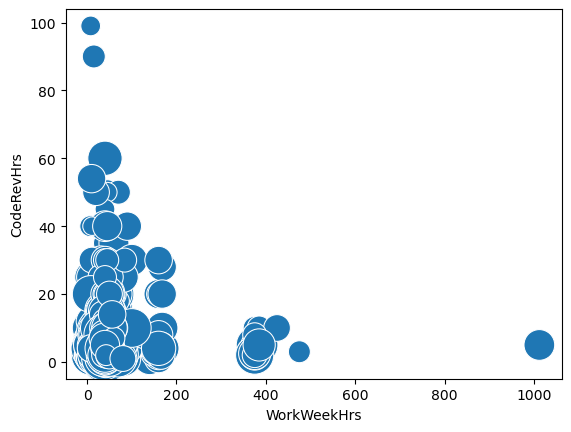

In [11]:
# your code goes here
sns.scatterplot(data = df,x= 'WorkWeekHrs',y = 'CodeRevHrs',size = 'Age',sizes=(10, 2000),legend=False)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [12]:
# your code goes here
QUERY = """
SELECT * 
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


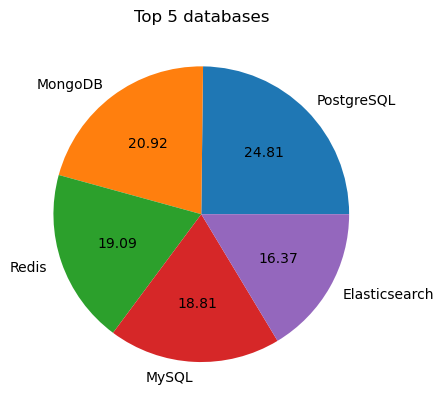

,Database,Counts
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


In [13]:
df_count=df['DatabaseDesireNextYear'].value_counts().rename_axis('Database').reset_index(name='Counts')
top_5=df_count[:5].copy()
plt.pie(top_5['Counts'],labels=top_5['Database'],autopct='%.2f')
plt.title('Top 5 databases')
plt.show()
top_5

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


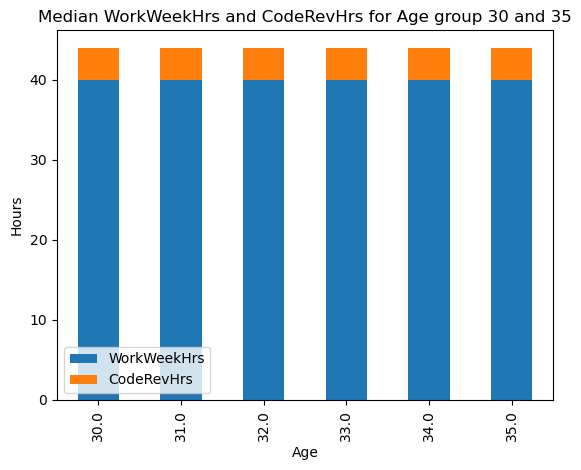

In [14]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs FROM
master WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)
df_median = df.groupby('Age').median()
df_median.plot(kind="bar", stacked=True)
plt.title('Median WorkWeekHrs and CodeRevHrs for Age group 30 and 35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


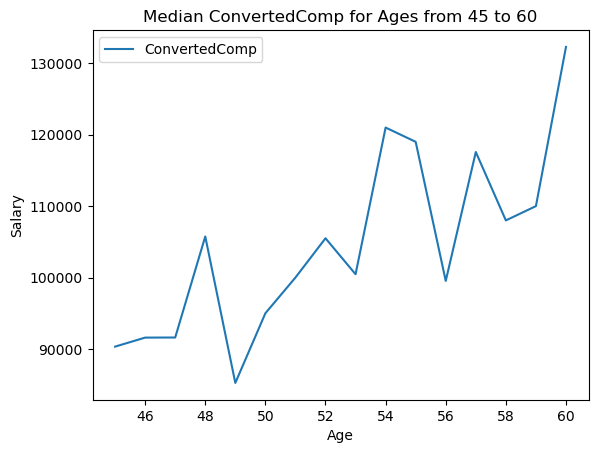

In [15]:
# your code goes here
QUERY = """
SELECT Age,ConvertedComp FROM
master WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)
df_median1 = df.groupby('Age').median()
df_median1.plot(kind='line')
plt.title('Median ConvertedComp for Ages from 45 to 60')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


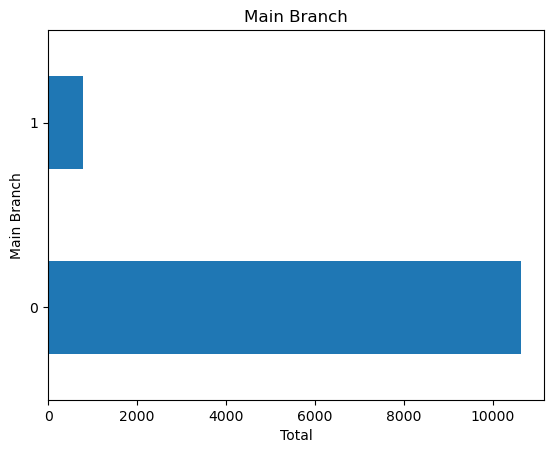

In [16]:
# your code goes here
QUERY = """
SELECT MainBranch FROM
master
"""
df = pd.read_sql_query(QUERY,conn)
new_df=df['MainBranch'].value_counts().rename_axis('MainBranch').reset_index(name='Counts')
new_df.plot(kind='barh',legend=False)
plt.title('Main Branch')
plt.xlabel('Total')
plt.ylabel('Main Branch')
plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
